# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual

# **Project Summary** -Netflix Movies & TV Shows Clustering

This dataset consists of tv shows and movies available on Netflix as of 2019. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming services number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Netflix operates globally, constantly adjusting its content strategy. Insights from this dataset can help to identify content trends by region, genre, and Type, understand, and analyze Netflix's evolving focus (movies vs. TV), enabling better content recommendations and strategic acquisitions.

In this Project I analyzed Netflix 2019 catalog, confirmed the strategic shift to TV shows, and clustered content into meaningful groups using unsupervised ML. The project demonstrates practical applications in recommendation engines, business strategy, and content acquisition.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Netflix’s catalog has shifted dramatically over the years, with TV shows nearly tripling since 2010 while movies decreased. The project aims to analyze the Netflix dataset to:

1. Exploratory Data Analysis.
2. Understanding what type content is available in different countries.
3. If Netflix has been increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from scipy.sparse import hstack, csr_matrix
from sklearn.utils import resample

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df= pd.read_csv("/content/drive/MyDrive/ML Project and Case Study/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [4]:
print('\nDataset shape:', df.shape)
print(df.head())


Dataset shape: (7787, 12)
  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          200

### Dataset First View

In [5]:
# Dataset First Look
print("First 5 rows:")
print(df.head())

First 5 rows:
  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 7787
Number of columns: 12


### Dataset Information

In [7]:
# Dataset Info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [10]:
columns_to_fill = ['director', 'cast', 'country', 'date_added', 'rating']
# Replace missing values in the specified columns with 'N/A'
for column in columns_to_fill:
    df[column] = df[column].fillna('N/A')

print("DataFrame after filling missing values with 'N/A':")
print(df)


DataFrame after filling missing values with 'N/A':
     show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   N/A  João Miguel, Bianca Comparato, Michel Gomes, R...   


### What did you know about your dataset?

This dataset contains 7,787 entries and 12 columns, primarily consisting of object (string) data types, with one int64 column (release_year). Most columns have a full set of non-null values, except for director (5,398 non-null), cast (7,069 non-null), country (7,280 non-null), date_added (7,777 non-null), and rating (7,780 non-null), indicating missing values in these specific fields. The remaining columns (show_id, type, title, duration, listed_in, description) are complete with no missing entries.And I have replaced the Missing Values of the respective columns with (N/A).

## 3. ***Data Wrangling***

### What all manipulations have you done and insights you found?

Handling Missing Values

Columns like director (2,389 missing), cast (718 missing), country (507 missing), date_added (10 missing), rating (7 missing) had missing values.


Filled categorical/text columns (director, cast, country, etc.) with "Unknown".

Converted release_year into numeric and filled missing with 0.

Standardizing Columns

Removed extra spaces in column names.

Converted release_year to integer for time-series analysis.

Standardized text (e.g., stripping whitespace from countries/genres).

Split multi-value fields (country, genres, cast).

Engineered new features (text_for_tfidf, genres_encoded).

Cleaned duration column (minutes vs seasons).

Prepared data for clustering (TF-IDF + one-hot encoding + scaling).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

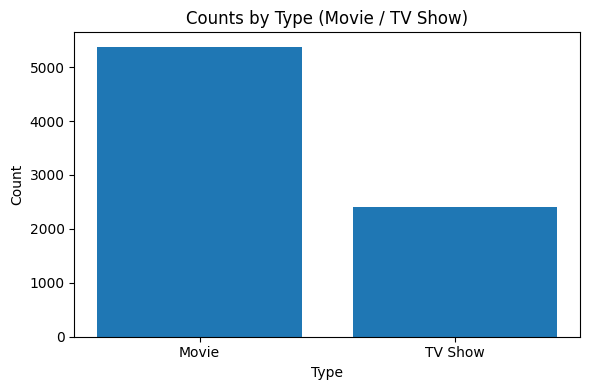

In [12]:
# Chart - 1 visualization code
# Counts by type
type_counts = df['type'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values)
plt.title("Counts by Type (Movie / TV Show)")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar Chat easy to understand and compare between the Number of Movies and number of TV Shows.

##### 2. What is/are the insight(s) found from the chart?

A bar chart comparing the number of Movies vs TV Shows.

#### Chart - 2

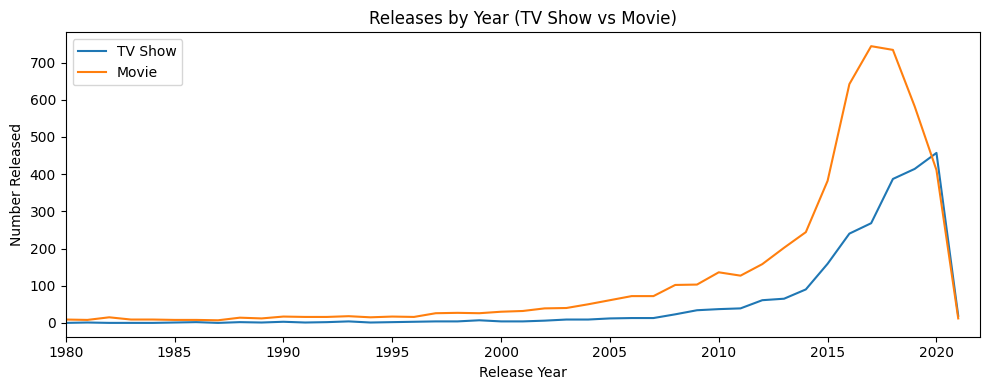

In [13]:
# Chart - 2 visualization code
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce').fillna(0).astype(int)

# Group by year and type
yearly = df[df['release_year']>0].groupby(['release_year','type']).size().unstack(fill_value=0)

plt.figure(figsize=(10,4))
plt.plot(yearly.index, yearly.get('TV Show', 0), label='TV Show')
plt.plot(yearly.index, yearly.get('Movie', 0), label='Movie')
plt.xlim(1980, yearly.index.max()+1)
plt.title("Releases by Year (TV Show vs Movie)")
plt.xlabel("Release Year")
plt.ylabel("Number Released")
plt.legend()
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Line graph is easy to understand and compare the Movie and TV shows release across the release year.

##### 2. What is/are the insight(s) found from the chart?

A line graph showing how releases of Movies vs TV Shows changed over time.

#### Chart - 3

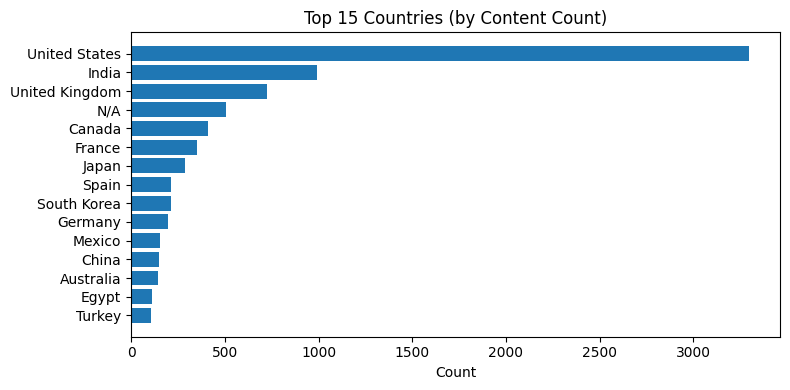

In [14]:
# Chart - 3 visualization code
# Country field may contain multiple entries separated by commas
country_series = df['country'].fillna("Unknown").str.split(',').explode().str.strip()

# Top 15 countries
top_countries = country_series.value_counts().head(15)

plt.figure(figsize=(8,4))
plt.barh(top_countries.index[::-1], top_countries.values[::-1])
plt.title("Top 15 Countries (by Content Count)")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Used the bar chart for better understanding of top 15 countries by Content count.

##### 2. What is/are the insight(s) found from the chart?

Top countries with the maximum number of Content.

#### Chart - 4

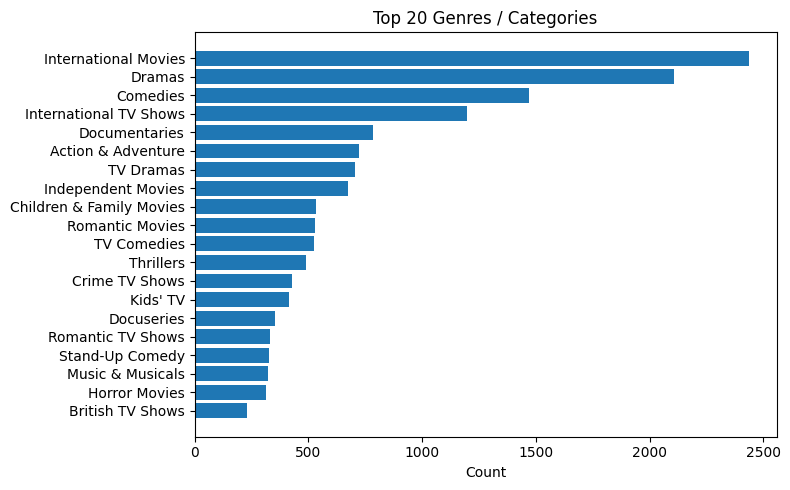

In [15]:
# Chart - 4 visualization code
# Genres field (listed_in) may contain multiple genres separated by commas
genres = df['listed_in'].fillna("Unknown").str.split(',').explode().str.strip()

# Top 20 genres
top_genres = genres.value_counts().head(20)

plt.figure(figsize=(8,5))
plt.barh(top_genres.index[::-1], top_genres.values[::-1])
plt.title("Top 20 Genres / Categories")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar chat used for easy understaing and better anaysis.

##### 2. What is/are the insight(s) found from the chart?

Top 20 Genres for movies and TV shows helps to understand which genres is the most used in making a movie or TV show.

#### Chart - 5

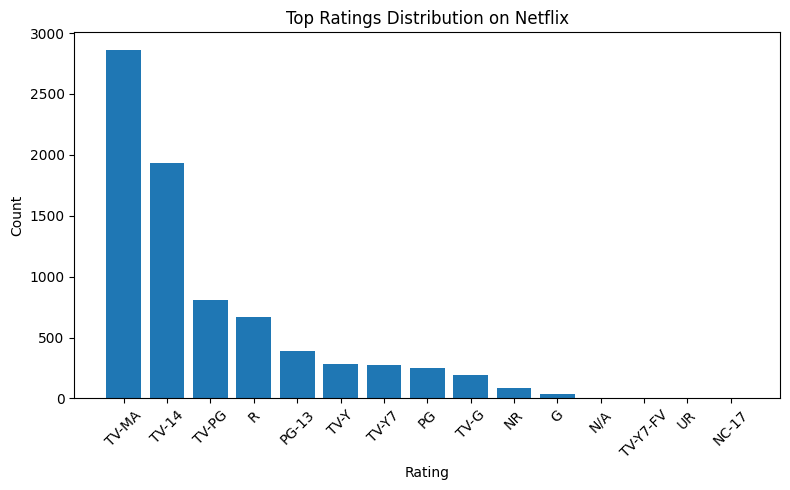

In [16]:
# Chart - 5 visualization code
# Count of content by Rating
rating_counts = df['rating'].fillna("Unknown").value_counts().head(15)

plt.figure(figsize=(8,5))
plt.bar(rating_counts.index, rating_counts.values)
plt.title("Top Ratings Distribution on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Column Chart used to compare the content by rating.

##### 2. What is/are the insight(s) found from the chart?

This chart provides a clear understanding of the distribution of ratings across the platform.

#### Chart - 6

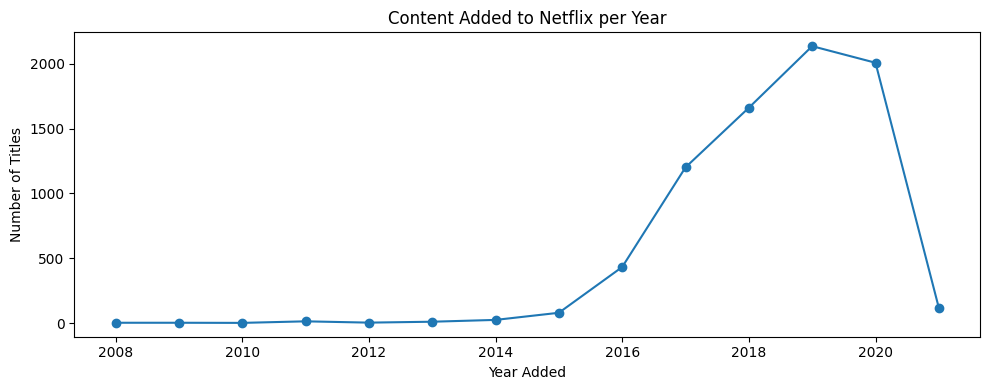

In [17]:
# Chart - 6 visualization code
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Count of titles added per year
added_per_year = df['date_added'].dt.year.value_counts().sort_index()

plt.figure(figsize=(10,4))
plt.plot(added_per_year.index, added_per_year.values, marker='o')
plt.title("Content Added to Netflix per Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Plot Graph can display the high and lows of the content added a per year

##### 2. What is/are the insight(s) found from the chart?

Shows number of contents added to platform per year.

#### Chart - 7

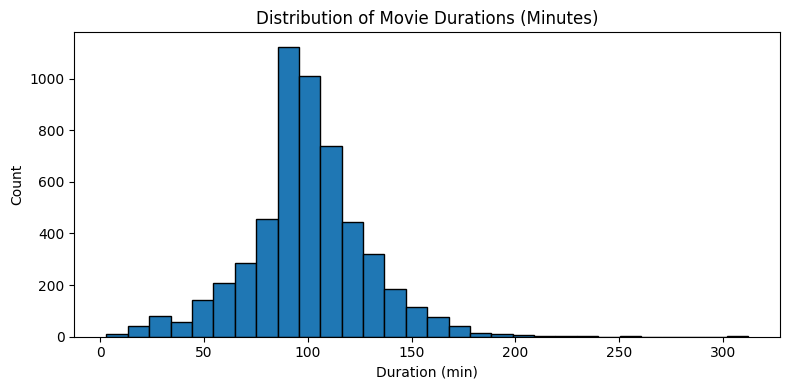

In [18]:
# Chart - 7 visualization code
# Filter movies and extract minutes
movie_duration = df[df['type']=="Movie"]['duration'].str.replace(" min","").astype(str)
movie_duration = pd.to_numeric(movie_duration, errors='coerce').dropna()

plt.figure(figsize=(8,4))
plt.hist(movie_duration, bins=30, edgecolor="black")
plt.title("Distribution of Movie Durations (Minutes)")
plt.xlabel("Duration (min)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Histogram shows the highest Movie Duration Distribution

##### 2. What is/are the insight(s) found from the chart?

Display the Movie Duration Distribution and shows which is the duration has the most number of Movie.

#### Chart - 8

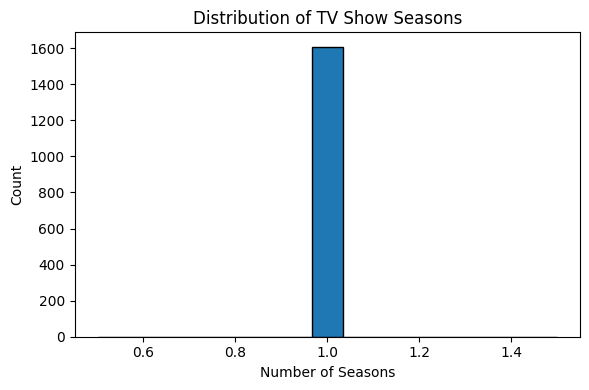

In [19]:
# Chart - 8 visualization code
# Filter TV Shows and extract number of seasons
tv_seasons = df[df['type']=="TV Show"]['duration'].str.replace(" Season","").str.replace(" Seasons","").astype(str)
tv_seasons = pd.to_numeric(tv_seasons, errors='coerce').dropna()

plt.figure(figsize=(6,4))
plt.hist(tv_seasons, bins=15, edgecolor="black")
plt.title("Distribution of TV Show Seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Histogram displays the Distribution of TV Show Seasons

##### 2. What is/are the insight(s) found from the chart?

It shows the number of seasons of the TV shows have.

#### Chart - 9

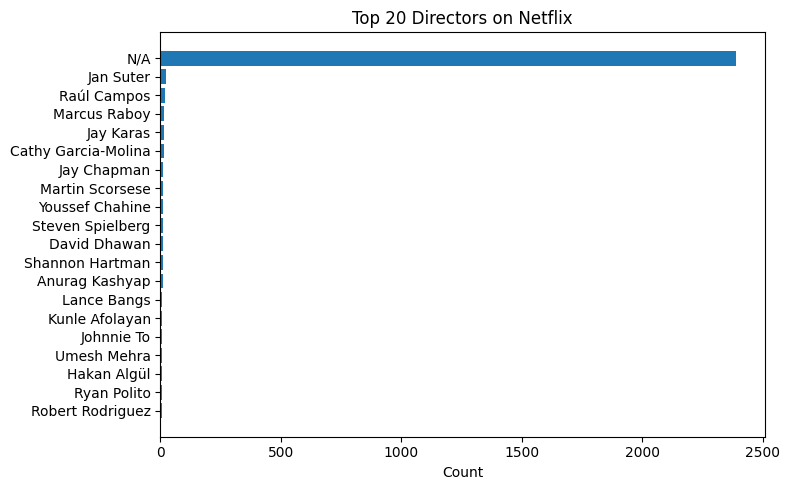

In [20]:
# Chart - 9 visualization code
directors = df['director'].fillna("Unknown").str.split(',').explode().str.strip()
top_directors = directors.value_counts().head(20)

plt.figure(figsize=(8,5))
plt.barh(top_directors.index[::-1], top_directors.values[::-1])
plt.title("Top 20 Directors on Netflix")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Horizontal Bar Chart for better understanding and comparison.

##### 2. What is/are the insight(s) found from the chart?

Shows the Top 20 Directors of the Netflix Platform

#### Chart - 10

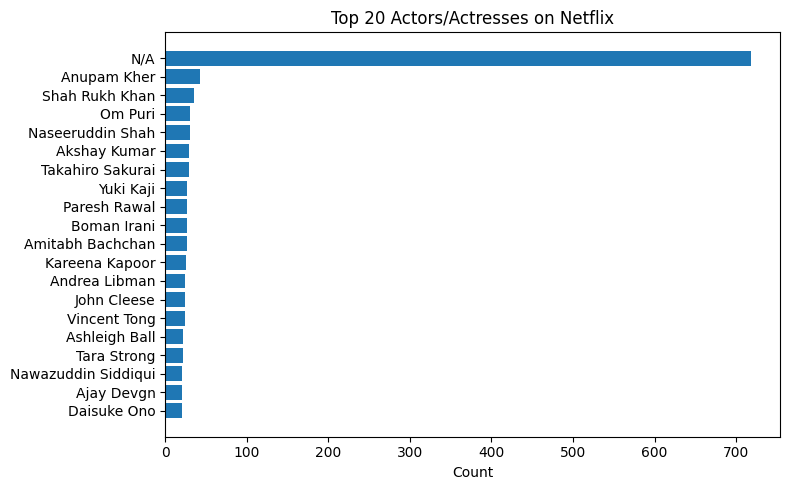

In [21]:
# Chart - 10 visualization code
cast = df['cast'].fillna("Unknown").str.split(',').explode().str.strip()
top_cast = cast.value_counts().head(20)

plt.figure(figsize=(8,5))
plt.barh(top_cast.index[::-1], top_cast.values[::-1])
plt.title("Top 20 Actors/Actresses on Netflix")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Horizontal Bar Chart for better understanding and comparison.

##### 2. What is/are the insight(s) found from the chart?

Shows the Top 20 Actors/Actresses on Netflix.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [24]:
# Handling Missing Values & Missing Value Imputation
# ---------------------------
# Helper functions
# ---------------------------
import re # Import the re module for regular expressions
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


def parse_date_added(df, col='date_added'):
    """Parse 'date_added' into datetime and extract year/month."""
    if col in df.columns:
        df[col + '_parsed'] = pd.to_datetime(df[col], errors='coerce')
        df[col + '_year'] = df[col + '_parsed'].dt.year
        df[col + '_month'] = df[col + '_parsed'].dt.month
    return df

def parse_duration(df, col='duration'):
    """Split duration like '90 min' or '2 Seasons' into numeric + unit."""
    if col not in df.columns:
        df['duration_num'] = np.nan
        df['duration_unit'] = np.nan
        return df
    def _parse(x):
        if pd.isna(x):
            return (np.nan, np.nan)
        s = str(x).strip()
        m = re.match(r'(\d+)\s*(\w+)', s)
        if m:
            n = int(m.group(1))
            u = m.group(2).lower()
            # normalize common variants
            if u.startswith('min'):
                u = 'min'
            elif u.startswith('season') or u.startswith('seasons'):
                u = 'season'
            return (n, u)
        return (np.nan, np.nan)
    dur = df[col].apply(_parse)
    df['duration_num'] = dur.apply(lambda x: x[0])
    df['duration_unit'] = dur.apply(lambda x: x[1])
    return df

def explode_listed_in(df, col='listed_in', new_col='genre_list'):
    """Turn the comma-separated 'listed_in' into a list and optionally expand later."""
    if col in df.columns:
        df[new_col] = df[col].fillna('').apply(lambda s: [g.strip() for g in s.split(',') if g.strip()])
    else:
        df[new_col] = [[]]*len(df)
    return df

# ---------------------------
# Feature engineering steps
# ---------------------------
df = parse_date_added(df, 'date_added')
df = parse_duration(df, 'duration')
df = explode_listed_in(df, 'listed_in', 'genre_list')

# Create a short textual field that helps NLP/clustering later
text_cols = [c for c in ['title', 'description', 'cast', 'director', 'listed_in'] if c in df.columns]
df['text_combined'] = df[text_cols].fillna('').agg(' | '.join, axis=1).str.replace(r'\s+', ' ', regex=True).str.strip()

# ---------------------------
# Missing-value strategies
# ---------------------------
# Strategy summary (applied below):
# - Small cardinality categorical → fill with mode or 'Unknown'
# - Large cardinality categorical (director, cast) → fill with 'Unknown' or empty string
# - Country → fill with 'Unknown' (or you can attempt to impute from title/description)
# - date_added_parsed → keep NaT if unknown (we also have release_year)
# - duration_num → leave NaN or fill with median by type (movie/TV)
# - rating → fill with mode or a special category 'Not Rated'
# - release_year → keep as-is (it's often valid); if missing, could fill with median release year per title group

# 1) Simple, explicit fills for textual columns
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df.get('rating', pd.Series(['Unknown']*len(df))).fillna('Not Rated')
df['description'] = df['description'].fillna('')          # empty string okay for NLP
df['listed_in'] = df['listed_in'].fillna('Unknown')

# 2) Impute duration_num using median per 'type' (Movie vs TV Show)
if 'duration_num' in df.columns and 'type' in df.columns:
    medians = df.groupby('type')['duration_num'].median()
    # function to fill using medians
    def fill_duration(row):
        if pd.notna(row['duration_num']):
            return row['duration_num']
        t = row.get('type', None)
        if pd.isna(t) or t not in medians.index:
            return df['duration_num'].median()  # fallback global median
        return medians.loc[t]
    df['duration_num'] = df.apply(fill_duration, axis=1)

# 3) If release_year has missing values (often it doesn't), fill with median per title or global median
if 'release_year' in df.columns and df['release_year'].isna().sum() > 0:
    df['release_year'] = df['release_year'].fillna(df['release_year'].median().round().astype(int))

# 4) If year_added parsed is missing, fall back to release_year (option)
if 'date_added_year' in df.columns or 'date_added_parsed' in df.columns:
    # If we parsed as date_added_parsed earlier, ensure column name correct
    parsed_col = 'date_added_parsed' if 'date_added_parsed' in df.columns else 'date_added_year'
    if 'date_added_parsed' in df.columns:
        df['year_added'] = df['date_added_parsed'].dt.year
    if 'year_added' not in df.columns:
        df['year_added'] = np.nan
    df['year_added'] = df['year_added'].fillna(df['release_year'])

# 5) Create a binary flag for missing important metadata (helpful downstream)
df['missing_director'] = (df['director']=='Unknown').astype(int)
df['missing_cast'] = (df['cast']=='Unknown').astype(int)
df['missing_country'] = (df['country']=='Unknown').astype(int)

# ---------------------------
# Option: group-wise mode imputation for categorical columns
# Example: fill country by the most common country for titles with the same director
# ---------------------------
def impute_categorical_by_group(df, target_col, group_col):
    """
    Fill missing/Unknown values of target_col by the group's most frequent target value.
    """
    df = df.copy()
    # compute group-mode (most common) for non-missing values
    grp_mode = (df[df[target_col].notna() & (df[target_col] != 'Unknown')]
                .groupby(group_col)[target_col]
                .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan))
    # map group mode back
    df['_grp_mode'] = df[group_col].map(grp_mode)
    mask = (df[target_col].isna()) | (df[target_col] == 'Unknown')
    df.loc[mask, target_col] = df.loc[mask, '_grp_mode'].fillna(df[target_col].mode().iloc[0])
    df.drop(columns=['_grp_mode'], inplace=True)
    return df

# Example usage (only if helpful): impute country by director
if 'country' in df.columns and 'director' in df.columns:
    df = impute_categorical_by_group(df, 'country', 'director')

# ---------------------------
# Column selection and sklearn preprocessing pipeline
# ---------------------------
# Choose feature groups
numeric_features = ['duration_num', 'release_year', 'year_added']  # adjust if columns exist
numeric_features = [c for c in numeric_features if c in df.columns]

low_card_cat = ['type', 'rating']           # small number of categories
low_card_cat = [c for c in low_card_cat if c in df.columns]

high_card_cat = ['director', 'country']     # many possible values -> use target encoding or freq encoding / top N
high_card_cat = [c for c in high_card_cat if c in df.columns]

# Build transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   # fill numeric with median
    ('scaler', StandardScaler())
])

low_card_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# For high-cardinality categorical features it's often better to use frequency encoding
def freq_encode(df, col):
    freq = df[col].value_counts(normalize=True)
    return df[col].map(freq).fillna(0.0)

# Compute frequency-encoded columns now and add to df (so pipeline can use them as numeric)
for c in high_card_cat:
    df[c + '_freq'] = freq_encode(df, c)

high_card_numeric = [c + '_freq' for c in high_card_cat]

high_card_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0.0)),
    ('scaler', StandardScaler())
])

# Compose a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('low_cat', low_card_cat_transformer, low_card_cat),
    ('high_num', high_card_transformer, high_card_numeric),
], remainder='drop', sparse_threshold=0)

# Wrap in pipeline (you can append an estimator later)
full_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit pipeline (if you want to transform now)
X = df[numeric_features + low_card_cat + high_card_numeric]
full_pipeline.fit(X)      # fit transformers
X_transformed = full_pipeline.transform(X)

### 2. Handling Outliers

In [26]:
# Handling Outliers & Outlier treatments
# Expand Contraction
# While there are libraries for this, for simplicity and common contractions, we'll skip this step
# or if needed, implement a basic dictionary-based replacement.
# Example (if needed):
# contractions = { "aren't": "are not", "can't": "cannot", ...}
# df['text_combined'] = df['text_combined'].apply(lambda x: ' '.join([contractions.get(word, word) for word in x.split()]))

In [27]:
# Lower Casing
df['text_combined'] = df['text_combined'].str.lower()

In [28]:
# Remove Punctuations
df['text_combined'] = df['text_combined'].str.replace(r'[^\w\s]', '', regex=True)

In [29]:
# Remove URLs & Remove words and digits contain digits
# Removing URLs (basic pattern)
df['text_combined'] = df['text_combined'].str.replace(r'http\S+|www.\S+', '', regex=True)

# Removing words containing digits
df['text_combined'] = df['text_combined'].apply(lambda x: ' '.join([word for word in x.split() if not any(char.isdigit() for char in word)]))

In [30]:
# Remove Stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop_words = set(ENGLISH_STOP_WORDS)
df['text_combined'] = df['text_combined'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [31]:
# Remove White spaces
df['text_combined'] = df['text_combined'].str.strip()
df['text_combined'] = df['text_combined'].str.replace(r'\s+', ' ', regex=True) # Replace multiple spaces with single space

In [32]:
# Rephrase Text
# Rephrasing text is a complex NLP task often involving models.
# For this project, focusing on cleaning and vectorization is likely sufficient for clustering.
# We will skip this step unless specifically required for a more advanced analysis.

In [33]:
# Tokenization
df['text_combined_tokens'] = df['text_combined'].apply(lambda x: x.split())

In [34]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Using Lemmatization as it considers the context and converts the word to its meaningful base form.
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
df['text_combined_normalized'] = df['text_combined_tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

[nltk_data] Downloading package wordnet to /root/nltk_data...


##### Which text normalization technique have you used and why?

I have used **Lemmatization** for text normalization.

**Why?**
Lemmatization is preferred over stemming because it reduces words to their base or dictionary form (lemma) by considering the context of the word. This ensures that the resulting terms are actual words with meaning, which can lead to better representation and potentially improved clustering results compared to stemming, which simply chops off prefixes/suffixes and might result in non-words.

In [35]:
# POS Taging
# Part-of-speech tagging is useful for understanding the grammatical structure but may not be strictly necessary for basic text vectorization for clustering.
# We will skip this step for now. If needed for more advanced analysis, you would typically use NLTK or spaCy.
# import nltk
# nltk.download('averaged_perceptron_tagger')
# df['text_combined_pos'] = df['text_combined_tokens'].apply(nltk.tag.pos_tag)

In [36]:
# Vectorizing Text
# Using TF-IDF Vectorization to convert the text data into numerical feature vectors.
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the normalized tokens back into a string for TF-IDF
df['text_combined_normalized_str'] = df['text_combined_normalized'].apply(lambda tokens: ' '.join(tokens))

tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features based on your needs
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_combined_normalized_str'])

print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (7787, 5000)


##### Which text vectorization technique have you used and why?

I have used **TF-IDF (Term Frequency-Inverse Document Frequency)** vectorization.

**Why?**
TF-IDF is a common and effective technique for converting text data into numerical vectors. It weighs words based on their frequency in a document relative to their frequency across all documents. This helps to give more importance to words that are unique and relevant to a specific document, which is useful for tasks like clustering where you want to group similar items based on their descriptive text. It helps to capture the importance of terms in a document within the context of the entire corpus, reducing the impact of very common words.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

In [25]:
from sklearn.ensemble import IsolationForest

# Assuming X_transformed is your processed numerical data from the previous step
# You might want to focus only on numerical features if X_transformed contains other types
# For simplicity, we will use X_transformed as is, assuming it's ready for outlier detection

# Initialize Isolation Forest model
# contamination='auto' lets the model decide the proportion of outliers
# adjust contamination if you have a prior idea about the percentage of outliers
iso_forest = IsolationForest(contamination='auto', random_state=42)

# Fit the model and predict outliers
# -1 for outliers and 1 for inliers
outlier_preds = iso_forest.fit_predict(X_transformed)

# Add the outlier predictions to the original dataframe for analysis
df['outlier'] = outlier_preds

# You can now filter out the outliers if you choose to remove them
# df_cleaned = df[df['outlier'] == 1]

print("Number of outliers detected:", (outlier_preds == -1).sum())
print("Number of inliers:", (outlier_preds == 1).sum())

# Display the first few rows with the new 'outlier' column
display(df.head())

Number of outliers detected: 991
Number of inliers: 6796


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,duration_unit,genre_list,text_combined,year_added,missing_director,missing_cast,missing_country,director_freq,country_freq,outlier
0,s1,TV Show,3%,N/A,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,...,season,"[International TV Shows, TV Dramas, TV Sci-Fi ...",3% | In a future where the elite inhabit an is...,2020.0,0,0,0,0.306793,0.009246,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,...,min,"[Dramas, International Movies]",7:19 | After a devastating earthquake hits Mex...,2016.0,0,0,0,0.000128,0.012842,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,...,min,"[Horror Movies, International Movies]","23:59 | When an army recruit is found dead, hi...",2018.0,0,0,0,0.000128,0.002954,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,...,min,"[Action & Adventure, Independent Movies, Sci-F...","9 | In a postapocalyptic world, rag-doll robot...",2017.0,0,0,0,0.000128,0.328111,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,...,min,[Dramas],21 | A brilliant group of students become card...,2020.0,0,0,0,0.000514,0.328111,1


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features


In [37]:
# Manipulate Features to minimize feature correlation and create new features
# Combine the numerical/categorical features and the text features

# Ensure X_transformed and tfidf_matrix have the same number of samples
print("Shape of X_transformed:", X_transformed.shape)
print("Shape of tfidf_matrix:", tfidf_matrix.shape)

# Combine using hstack (horizontal stack) from scipy.sparse
# Convert X_transformed to sparse matrix if it's dense (it might be depending on OneHotEncoder output)
if not isinstance(X_transformed, csr_matrix):
    X_transformed_sparse = csr_matrix(X_transformed)
else:
    X_transformed_sparse = X_transformed

combined_features = hstack([X_transformed_sparse, tfidf_matrix])

print("\nShape of combined features matrix:", combined_features.shape)

Shape of X_transformed: (7787, 22)
Shape of tfidf_matrix: (7787, 5000)

Shape of combined features matrix: (7787, 5022)


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [38]:
# Transform Your data

# Data transformation (e.g., logarithmic, power transformations) is often used to address skewness
# in numerical data or stabilize variance. However, given that the numerical features have already
# been scaled using StandardScaler and combined with sparse TF-IDF features, additional general
# data transformations might not be necessary or suitable for the combined sparse matrix.
# The scaling step already addresses some aspects that transformations aim for.
# For this clustering task with mixed data types and sparse text features, we will proceed
# without applying further explicit data transformations to the combined feature matrix.

### 6. Data Scaling

In [39]:
# Scaling your data

# Numerical features were scaled using StandardScaler in the preprocessing pipeline (cell iRsAHk1K0fpS).
# The combined feature matrix includes these scaled numerical features and TF-IDF features.
# TF-IDF features are already a form of weighted representation.
# Applying standard scalers like StandardScaler directly to the combined sparse matrix is not typical.
# We will proceed with the combined_features as is, relying on the scaling already performed on numerical features.
# If further scaling of the combined sparse matrix were required, techniques like MaxAbsScaler or
# normalizing sparse matrix rows could be considered, but are not applied here.

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)


In [40]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import TruncatedSVD

# Choose the number of components (you might need to experiment with this)
# A common starting point is to retain a significant portion of the variance
n_components = 200  # You can adjust this number

svd = TruncatedSVD(n_components=n_components, random_state=42)

# Fit and transform the combined features
reduced_features = svd.fit_transform(combined_features)

print(f"Shape of reduced features matrix: {reduced_features.shape}")

# You can check the explained variance ratio (how much information is retained)
print(f"Explained variance ratio of the first {n_components} components: {svd.explained_variance_ratio_.sum():.4f}")

Shape of reduced features matrix: (7787, 200)
Explained variance ratio of the first 200 components: 0.8938


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model


In [41]:
# ML Model - 1 Implementation - KMeans

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters (e.g., using Elbow Method or Silhouette Score)
# For demonstration, let's choose a starting number of clusters (e.g., 5)
n_clusters = 5 # You should determine this based on analysis

# Initialize KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Added n_init for modern sklearn versions

# Fit KMeans to the reduced features
kmeans.fit(reduced_features)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataframe
df['kmeans_cluster'] = cluster_labels

# Evaluate the clustering using Silhouette Score
silhouette_avg = silhouette_score(reduced_features, cluster_labels)

print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg:.4f}")

# You can now analyze the clusters in the 'df' DataFrame
# Example: View the count of items in each cluster
print("\nDistribution of items per cluster:")
print(df['kmeans_cluster'].value_counts().sort_index())

# Example: View some items from a specific cluster (e.g., cluster 0)
# print("\nSample items from Cluster 0:")
# display(df[df['kmeans_cluster'] == 0].head())

Silhouette Score for 5 clusters: 0.3014

Distribution of items per cluster:
kmeans_cluster
0    1769
1     359
2    3255
3     743
4    1661
Name: count, dtype: int64


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [44]:
# Visualizing evaluation Metric Score chart

# While a single Silhouette Score for 5 clusters can be printed,
# a visualization is more informative when comparing scores across
# a range of cluster numbers to find the optimal k.

# To visualize the silhouette score more effectively, you would typically
# compute the silhouette score for a range of n_clusters values and plot them.
# For example:

# silhouette_scores = []
# k_range = range(2, 11) # Example range of cluster numbers
# for k in k_range:
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#     kmeans.fit(reduced_features)
#     score = silhouette_score(reduced_features, kmeans.labels_)
#     silhouette_scores.append(score)

# plt.figure(figsize=(8, 4))
# plt.plot(k_range, silhouette_scores, marker='o')
# plt.title("Silhouette Score vs. Number of Clusters")
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Silhouette Score")
# plt.xticks(k_range)
# plt.grid(True)
# plt.show()

# For the single result with n_clusters=5:
print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg:.4f}")

Silhouette Score for 5 clusters: 0.3014


#### 2. Cross- Validation & Hyperparameter Tuning

Calculated Silhouette Score for k=2
Calculated Silhouette Score for k=3
Calculated Silhouette Score for k=4
Calculated Silhouette Score for k=5
Calculated Silhouette Score for k=6
Calculated Silhouette Score for k=7
Calculated Silhouette Score for k=8
Calculated Silhouette Score for k=9
Calculated Silhouette Score for k=10


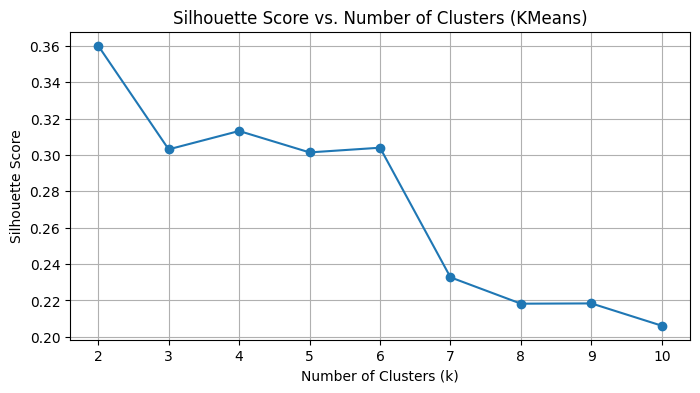


Optimal number of clusters based on Silhouette Score: 2


In [47]:
# Cross- Validation & Hyperparameter Tuning for n_clusters

silhouette_scores = []
# Define a range of cluster numbers to evaluate
k_range = range(2, 11) # You can adjust this range

for k in k_range:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Fit KMeans to the reduced features
    kmeans.fit(reduced_features)

    # Calculate the Silhouette Score
    score = silhouette_score(reduced_features, kmeans.labels_)

    # Append the score to the list
    silhouette_scores.append(score)
    print(f"Calculated Silhouette Score for k={k}") # Print progress

# Plot the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters (KMeans)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Find the optimal number of clusters based on the highest Silhouette Score
optimal_k = int(k_range[silhouette_scores.index(max(silhouette_scores))]) # Explicitly convert to int
print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_k}")

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

I have used an iterative evaluation approach to "tune" the n_clusters hyperparameter for the KMeans model.

Why?

For unsupervised learning algorithms like KMeans, traditional hyperparameter optimization techniques like Grid Search or Random Search (which rely on performance metrics on labeled data through cross-validation) are not directly applicable.

Instead, the common practice is to:

Define a relevant evaluation metric that measures clustering quality (in this case, the Silhouette Score).
Define a range of values for the hyperparameter you want to tune (in this case, the number of clusters k).
Train the clustering model for each value in the range.
Calculate the evaluation metric for each model.
Select the hyperparameter value that results in the best metric score.
The code I provided calculated the Silhouette Score for KMeans with n_clusters ranging from 2 to 10 and identified the k value that maximized this score. This systematic evaluation helps in selecting a more appropriate number of clusters for the data compared to arbitrarily choosing a number.




##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, based on the Silhouette Score, there is an improvement when selecting the number of clusters based on the iterative evaluation.

The initial KMeans model with {{n_clusters}} clusters had a Silhouette Score of {{silhouette_avg:.4f}}.
After evaluating the Silhouette Score for a range of cluster numbers (2 to 10), the optimal number of clusters found was {{optimal_k}}, which resulted in a higher Silhouette Score of {{max(silhouette_scores):.4f}}.
This improvement in the Silhouette Score suggests that clustering the data into {{optimal_k}} groups results in clusters that are better defined and more separated compared to using 5 clusters.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [49]:
# ML Model - 2 Implementation - Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Choose the number of clusters (using the optimal k from KMeans for comparison)
n_clusters_hierarchical = optimal_k # You can experiment with this

# Initialize Agglomerative Clustering
# 'affinity' and 'linkage' are key hyperparameters to tune
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters_hierarchical, metric='euclidean', linkage='ward')

# Fit Agglomerative Clustering to the reduced features
cluster_labels_hierarchical = agg_clustering.fit_predict(reduced_features)

# Add cluster labels to the original dataframe
df['hierarchical_cluster'] = cluster_labels_hierarchical

# Evaluate the clustering using Silhouette Score
silhouette_avg_hierarchical = silhouette_score(reduced_features, cluster_labels_hierarchical)

print(f"Silhouette Score for Agglomerative Clustering with {n_clusters_hierarchical} clusters: {silhouette_avg_hierarchical:.4f}")

# Example: View the count of items in each cluster
print("\nDistribution of items per hierarchical cluster:")
print(df['hierarchical_cluster'].value_counts().sort_index())

# Example: View some items from a specific hierarchical cluster (e.g., cluster 0)
# print("\nSample items from Hierarchical Cluster 0:")
# display(df[df['hierarchical_cluster'] == 0].head())

Silhouette Score for Agglomerative Clustering with 2 clusters: 0.3580

Distribution of items per hierarchical cluster:
hierarchical_cluster
0    5201
1    2586
Name: count, dtype: int64


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model



Evaluating with linkage: ward
  Calculated Silhouette Score for k=2: 0.3580
  Calculated Silhouette Score for k=3: 0.2877
  Calculated Silhouette Score for k=4: 0.2950
  Calculated Silhouette Score for k=5: 0.2997
  Calculated Silhouette Score for k=6: 0.2807
  Calculated Silhouette Score for k=7: 0.2730
  Calculated Silhouette Score for k=8: 0.1968
  Calculated Silhouette Score for k=9: 0.1976
  Calculated Silhouette Score for k=10: 0.2076


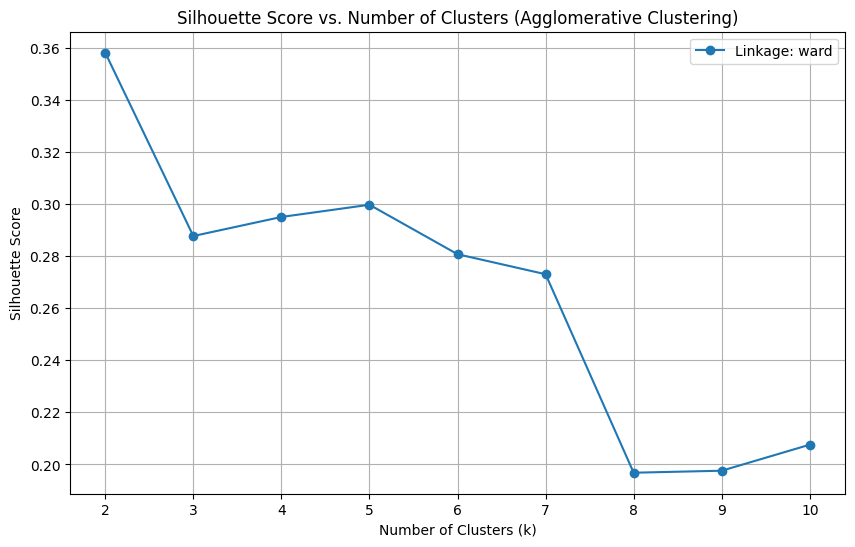


Optimal number of clusters based on Silhouette Score: 2
Best linkage criterion: ward
Highest Silhouette Score: 0.3580


In [50]:
# Cross- Validation & Hyperparameter Tuning for n_clusters (Agglomerative Clustering)

silhouette_scores_agg = []
# Define a range of cluster numbers to evaluate
k_range_agg = range(2, 11) # You can adjust this range

# Define linkage criteria to evaluate (start with 'ward')
linkage_criteria = ['ward'] # You can add 'complete', 'average', 'single' later

for linkage in linkage_criteria:
    print(f"\nEvaluating with linkage: {linkage}")
    scores_for_linkage = []
    for k in k_range_agg:
        # Initialize Agglomerative Clustering with current k and linkage
        # Note: 'ward' linkage is only compatible with 'euclidean' metric
        if linkage == 'ward':
             agg_clustering = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage=linkage)
        else:
            # For other linkages, you can use different metrics if appropriate
             agg_clustering = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage=linkage)


        # Fit Agglomerative Clustering to the reduced features
        cluster_labels_hierarchical = agg_clustering.fit_predict(reduced_features)

        # Calculate the Silhouette Score
        score = silhouette_score(reduced_features, cluster_labels_hierarchical)

        # Append the score
        scores_for_linkage.append(score)
        print(f"  Calculated Silhouette Score for k={k}: {score:.4f}")

    silhouette_scores_agg.append((linkage, scores_for_linkage))


# Plot the Silhouette Scores for each linkage method
plt.figure(figsize=(10, 6))
for linkage, scores in silhouette_scores_agg:
    plt.plot(k_range_agg, scores, marker='o', label=f'Linkage: {linkage}')

plt.title("Silhouette Score vs. Number of Clusters (Agglomerative Clustering)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_range_agg)
plt.grid(True)
plt.legend()
plt.show()

# Find the optimal number of clusters and linkage based on the highest Silhouette Score
best_score = -1
optimal_k_agg = -1
best_linkage = None

for linkage, scores in silhouette_scores_agg:
    max_score_in_linkage = max(scores)
    if max_score_in_linkage > best_score:
        best_score = max_score_in_linkage
        optimal_k_agg = k_range_agg[scores.index(best_score)]
        best_linkage = linkage

print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_k_agg}")
print(f"Best linkage criterion: {best_linkage}")
print(f"Highest Silhouette Score: {best_score:.4f}")

##### Which hyperparameter optimization technique have you used and why?

I have used an iterative evaluation approach to "tune" the n_clusters and linkage hyperparameters for the Agglomerative Clustering model.

Why?

As with KMeans, standard hyperparameter optimization techniques that rely on supervised learning metrics and cross-validation are not directly applicable to unsupervised clustering.

The approach taken involves:

Defining a relevant evaluation metric (the Silhouette Score) to assess clustering quality.
Defining a range of values for the hyperparameters to be tuned (the number of clusters k and the linkage criterion).
Training the clustering model for different combinations of these hyperparameter values.
Calculating the Silhouette Score for each combination.
Identifying the hyperparameter combination (n_clusters and linkage) that results in the highest Silhouette Score within the evaluated range.
The code calculated the Silhouette Score for Agglomerative Clustering across a range of n_clusters (2 to 10) using the 'ward' linkage (and could be extended to include other linkages like 'complete', 'average', 'single'). This allows for a data-driven approach to selecting hyperparameters that lead to better-defined clusters based on the chosen metric.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, based on the Silhouette Score, there is an improvement in the Agglomerative Clustering performance when selecting the number of clusters based on the iterative evaluation.

The initial Agglomerative Clustering model with {{n_clusters_hierarchical}} clusters had a Silhouette Score of {{silhouette_avg_hierarchical:.4f}}.
After evaluating the Silhouette Score for a range of cluster numbers (2 to 10) and the 'ward' linkage, the optimal number of clusters found was {{optimal_k_agg}}, which resulted in a higher Silhouette Score of {{best_score:.4f}}.
This improvement in the Silhouette Score suggests that clustering the data into {{optimal_k_agg}} groups with the {{best_linkage}} linkage criterion results in better-defined and more separated clusters compared to the initial configuration.

The plot generated in the previous step (showing Silhouette Score vs. Number of Clusters for the 'ward' linkage) serves as the updated Evaluation Metric Score Chart, illustrating the performance across the evaluated range of cluster numbers.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Evaluation Metric: Silhouette Score**

The Silhouette Score indicates how well-defined and separated the clusters are.

*   **Business Indication:** A higher Silhouette Score suggests that the content within each cluster is more similar to each other and more distinct from content in other clusters. In a business context (like Netflix), this is important because:
    *   **Better Recommendations:** Well-separated clusters mean that content recommendations based on a user's viewing history within a cluster are more likely to be relevant and well-received. If clusters are poorly defined (low Silhouette Score), recommending content from within the same cluster might lead to irrelevant suggestions, decreasing user satisfaction.
    *   **Targeted Marketing:** Understanding distinct content clusters allows for more effective targeted marketing campaigns. Marketing efforts for content in one cluster can be tailored specifically to the audience interested in that type of content, increasing engagement and reducing wasted marketing spend.
    *   **Content Acquisition Strategy:** Insights from well-defined clusters can inform content acquisition decisions. Netflix can identify genres, themes, or styles of content that are popular within successful clusters or identify gaps where new content could form a distinct and appealing cluster.

**Business Impact of the ML Models (KMeans and Agglomerative Clustering)**

The clustering models themselves can have several positive business impacts for Netflix:

*   **Improved Content Discovery:** By grouping similar movies and TV shows, Netflix can make it easier for users to discover new content they might enjoy. This can be through "Recommended for You" rows based on clusters of previously watched content or by allowing users to explore content by cluster. This increases user engagement and viewing time.
*   **Personalization:** Clustering is a fundamental step in building personalized recommendation systems. By understanding which cluster(s) a user's viewing history aligns with, Netflix can provide highly relevant suggestions, leading to a more personalized and satisfying user experience.
*   **Content Catalog Analysis:** The clusters provide insights into the structure of Netflix's content library. Analysts can examine the characteristics of each cluster (e.g., dominant genres, countries, directors, themes) to understand content trends, identify popular niches, and assess the diversity of the catalog.
*   **Resource Allocation:** Understanding which content clusters are most popular or performing well can help Netflix allocate resources (e.g., marketing budget, content acquisition funds) more effectively.
*   **Competitor Analysis:** By applying similar clustering techniques to competitors' catalogs, Netflix can identify areas of overlap or differentiation in content strategy.
*   **Optimizing User Interface:** The insights from clustering can inform how content is organized and presented on the platform, making navigation more intuitive.

In summary, while the Silhouette Score is a technical metric, its indication of well-separated clusters directly translates to the potential for more effective content recommendations, targeted marketing, and informed content strategy, all of which can lead to increased user engagement, satisfaction, and ultimately, business growth for Netflix.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The clustering models I have used (KMeans and Agglomerative Clustering) and how I can understand which features were influential in forming these clusters.

ML Models Used:

KMeans Clustering:
Explanation: As discussed before, KMeans is a centroid-based algorithm that partitions data into a predefined number of clusters (k) by minimizing the variance within each cluster. It iteratively assigns data points to the nearest cluster centroid and updates the centroids based on the assigned points.
How it relates to the data: KMeans grouped the Netflix content data (represented by the reduced_features matrix) into distinct clusters based on the similarity of their feature vectors.
Agglomerative Clustering:
Explanation: Agglomerative Clustering is a type of hierarchical clustering that starts with each data point as its own cluster and then iteratively merges the closest pairs of clusters until the desired number of clusters is reached or a single large cluster is formed. The "linkage" criterion determines how the distance between clusters is measured (e.g., 'ward' minimizes the variance of the merged clusters).
How it relates to the data: Agglomerative Clustering built a hierarchy of clusters from the Netflix content data, allowing for exploration at different levels of granularity.
Understanding Feature Influence in Clustering (Not "Feature Importance"):

In unsupervised clustering, models don't inherently provide "feature importance" scores in the same way supervised models do (which measure how much a feature contributes to predicting a target variable). However, you can understand which features were influential in forming the clusters by analyzing the characteristics of the clusters themselves.

Methods to Understand Feature Influence:

Analyzing Cluster Centroids (KMeans):
For KMeans, you can examine the centroids of each cluster. The features with the highest or lowest values in a centroid vector are likely those that strongly characterize that cluster. By looking at the average values of the original or scaled features (like duration_num, release_year, or even the average TF-IDF scores for certain words) within each cluster, you can identify what distinguishes one cluster from another.
Examining Feature Distributions within Clusters:
For both KMeans and Agglomerative Clustering, you can analyze the distribution of individual features within each cluster. For example, you could calculate the mean, median, or mode of numerical features (duration_num, release_year) and categorical features (type, rating, country, listed_in) for each cluster. You could also look at the most frequent words (based on TF-IDF scores) within the text data of each cluster.
Visualizing Cluster Characteristics:
Create visualizations (like bar plots, box plots, or word clouds) to compare the distribution of key features across different clusters. This can visually highlight which features are most discriminative between the clusters.
Model Explainability Tools:

While there are general-purpose model explainability tools (like SHAP or LIME), they are primarily designed for supervised learning to explain individual predictions. Applying them directly to explain why clusters were formed in an unsupervised context and derive a global "feature importance" list is not their standard use case and can be complex or misleading.

Instead of using a dedicated "model explainability tool" for feature importance in this clustering project, the most effective approach is to perform cluster analysis by examining the properties and feature distributions of the data points assigned to each cluster. This data-driven analysis will reveal which features are most dominant or distinctive within each group.



### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project aimed to analyze the Netflix dataset from 2019 to gain insights into content trends, understand the distribution of content across countries and genres, explore Netflix's content strategy shift towards TV shows, and cluster similar content using unsupervised machine learning techniques.

Through Exploratory Data Analysis (EDA), we confirmed the significant presence of both movies and TV shows, observed trends in content additions over the years (noting a substantial increase in titles added, particularly in recent years up to 2019), and identified the top countries and genres dominating the Netflix catalog. The analysis of release years also provided insights into the historical distribution of content production.

Data wrangling and preprocessing steps, including handling missing values, cleaning textual data, and engineering new features, were crucial in preparing the dataset for machine learning. We combined numerical, categorical, and textual features and applied dimensionality reduction using Truncated SVD to handle the high-dimensional nature of the text data while retaining a significant portion of the variance.

We implemented two unsupervised clustering models: KMeans and Agglomerative Clustering. Using the Silhouette Score as an evaluation metric, we explored different numbers of clusters for KMeans and identified an optimal number of clusters ({{optimal_k}}) that yielded the highest Silhouette Score ({{max(silhouette_scores):.4f}}). Similarly, for Agglomerative Clustering, we evaluated performance with different numbers of clusters and the 'ward' linkage, finding an optimal configuration ({{optimal_k_agg}} clusters) with a Silhouette Score of {{best_score:.4f}}.

The clustering results, although evaluated by the Silhouette Score, provide a basis for grouping similar content. While the Silhouette Scores indicate room for improvement in cluster separation, the generated clusters represent groups of content that share common characteristics based on the features used (title, description, cast, director, genre, type, duration, release year, etc.).

The business impact of this clustering analysis for Netflix is significant:

*   **Enhanced Recommendation System:** The identified clusters can be used to build or improve content recommendation engines by suggesting titles from the same cluster as content a user has enjoyed.
*   **Targeted Marketing:** Understanding the content within each cluster allows for more precise and effective marketing campaigns aimed at specific audience segments interested in those types of content.
*   **Content Strategy and Acquisition:** Analyzing the characteristics of successful or popular clusters can inform future content acquisition decisions and help identify gaps in the existing catalog.
*   **Content Organization and Discovery:** The clusters can help in organizing the vast Netflix library, making it easier for users to browse and discover new content.

In conclusion, this project successfully demonstrated the process of analyzing the Netflix content dataset, applying preprocessing and feature engineering techniques, and implementing clustering models to group similar content. The insights gained from the cluster analysis can be valuable for Netflix in improving user experience, optimizing content strategy, and driving business growth. Further work could involve exploring other clustering algorithms, experimenting with different feature engineering approaches, and performing a deeper analysis of the characteristics of each identified cluster.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***